In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

For this first exercise we are going to use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), a classic one. Make sure you read the documentation for the dataset and explore it to make sure you know how to tackle the exercise.

We load the dataset

In [3]:
import sklearn
sklearn.__version__

'0.19.1'

In [4]:
import pickle

with open("./data/mnist.pkl", "rb") as fname:
    mnist = pickle.load(fname)

In [5]:
mnist_data = mnist["training_images"]
mnist_target = mnist["training_labels"]

In [ ]:
mnist_data = mnist_data[:,:3]

In [ ]:
mnist_data.shape

In [ ]:
mnist_target.shape

In [ ]:
from mpl_toolkits.mplot3d import Axes3D #we need to import this to use 3d projection
import ipywidgets as widgets
from IPython.display import display


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("variable 1", size=20)
ax.set_ylabel("variable 2", size=20)
ax.set_zlabel("variable 3", size=20)
ax.scatter(mnist_data[:,0], mnist_data[:,1], mnist_data[:,2], c=mnist_target,
           cmap=cm.prism)
ax.view_init(20, 120)
plt.show()

def update_chart(angle1=20, angulo2=120):
    # We change the degree
    ax.view_init(angle1, angulo2)
    fig.canvas.draw_idle()

# widgets
angle1_slider = widgets.IntSlider(20, min = 0, max = 90)
display(angle1_slider)

def update_angle1(value):
    update_chart(angle1=value['new'])

angle1_slider.observe(update_angle1, names='value');

The dataset consists off 70000 images of handwritten digits, each one 28x28 pixels in black and white (0 being absolute black and 255 being absolute white). For convenience scikit-learn provides them as an array of 784 elements (28 x 28).

In [6]:
digit = mnist_data[0]

In [7]:
digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
digit.shape

(784,)

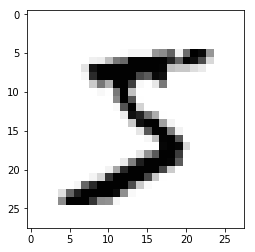

In [9]:
plt.imshow(digit.reshape(28,28), cmap="Greys");

To speed things up, we will get a sample of 10000 observations. I set numpy's random seed for reproducibility.

In [10]:
sample_size = 10000
np.random.seed(42)
random_sample_index = np.random.randint(0, mnist_data.shape[0], sample_size)
random_sample_index

array([56422, 15795,   860, ...,  9484,  5495, 28481])

In [11]:
mnist_sample_data = mnist_data[random_sample_index]
mnist_sample_target = mnist_target[random_sample_index]

In [12]:
mnist

{'training_images': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'test_images': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'training_labels': array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 'test_labels': array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)}

### Use PCA to reduce the mnist sample dimensionality and create a classifier that correctly classifies the images, using as the scorer the F1 score (there are multiple f1 scores for multiclass, choose the one you think fits best the problem, the [documentation can help](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)). A good classifier would have a F1 above 0.99

In [13]:
mnist_sample_data.mean(axis=0)

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.26000000e-02,   4.70000000e-02,   2.16000000e-02,
         9.00000000e-04,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.60000000e-03,
         4.70000000e-03,   8.50000000e-03,   2.53000000e-02,
         2.74000000e-02,   6.72000000e-02,   1.17300000e-01,
         2.51500000e-01,   2.51700000e-01,   3.28300000e-01,
         2.42600000e-01,   2.27900000e-01,   3.98900000e-01,
         2.99500000e-01,   1.16400000e-01,   5.34000000e-02,
         1.82000000e-02,

In [14]:
mnist_sample_data_centered = (mnist_sample_data - mnist_sample_data.mean(axis=0))

In [15]:
cov_mat = np.cov(m=mnist_sample_data_centered.T)
cov_mat

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [16]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

print('EigenVectors:\n', eigenvectors)
print('\nEigenValues:', eigenvalues)

EigenVectors:
 [[ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]
 ..., 
 [ 0.+0.j  0.+0.j  0.+0.j ...,  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  1.+0.j]]

EigenValues: [  3.31389728e+05 +0.00000000e+00j   2.46533723e+05 +0.00000000e+00j
   2.04271777e+05 +0.00000000e+00j   1.82667793e+05 +0.00000000e+00j
   1.66246629e+05 +0.00000000e+00j   1.49216350e+05 +0.00000000e+00j
   1.13052984e+05 +0.00000000e+00j   9.85248596e+04 +0.00000000e+00j
   9.43603018e+04 +0.00000000e+00j   7.95021256e+04 +0.00000000e+00j
   7.28706457e+04 +0.00000000e+00j   6.87228352e+04 +0.00000000e+00j
   5.88685595e+04 +0.00000000e+00j   5.77717736e+04 +0.00000000e+00j
   5.29197119e+04 +0.00000000e+00j   5.07134166e+04 +0.00000000e+00j
   4.51867105e+04 +0.00000000e+00j   4.37460728e+04 +0.00000000e+00j
   4.0

In [17]:
np.argsort(eigenvalues)[::-1]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  62,  61,  63,  64,
        66,  65,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  84,  83,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98, 100,  99, 101, 102, 105,
       103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 126, 129, 128,
       131, 134, 133, 132, 130, 135, 137, 136, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 151, 150, 152, 153, 154, 156,
       157, 155, 158, 159, 160, 161, 162, 163, 164, 166, 167, 165, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
components_order = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[components_order]

sorted_eigenvectors = eigenvectors[:,components_order]

print('Sorted EigenVectors:\n', sorted_eigenvectors)
print('\nSorted EigenValues:', sorted_eigenvalues)

Sorted EigenVectors:
 [[ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.-0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.-0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.-0.j]
 ..., 
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.-0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.-0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.-0.j]]

Sorted EigenValues: [  3.31389728e+05 +0.00000000e+00j   2.46533723e+05 +0.00000000e+00j
   2.04271777e+05 +0.00000000e+00j   1.82667793e+05 +0.00000000e+00j
   1.66246629e+05 +0.00000000e+00j   1.49216350e+05 +0.00000000e+00j
   1.13052984e+05 +0.00000000e+00j   9.85248596e+04 +0.00000000e+00j
   9.43603018e+04 +0.00000000e+00j   7.95021256e+04 +0.00000000e+00j
   7.28706457e+04 +0.00000000e+00j   6.87228352e+04 +0.00000000e+00j
   5.88685595e+04 +0.00000000e+00j   5.77717736e+04 +0.00000000e+00j
   5.29197119e+04 +0.00000000e+00j   5.07134166e+04 +0.00000000e+00j
   4.51867105e+04 +0.00000000e+00j   4.37460728e+04 +0.000000

In [19]:
sorted_eigenvectors = sorted_eigenvectors[0:3]
sorted_eigenvectors

array([[ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.-0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.-0.j]])

In [20]:
sorted_eigenvalues = sorted_eigenvalues[0:3]
sorted_eigenvalues

array([ 331389.72848278+0.j,  246533.72306517+0.j,  204271.77702724+0.j])

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [22]:
mean_x = mnist_sample_data_centered[:,0].mean()
mean_y = mnist_sample_data_centered[:,1].mean()
mean_z = mnist_sample_data_centered[:,2].mean()

In [23]:
from matplotlib import cm
import ipywidgets as widgets

In [24]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X axis", size=20)
ax.set_ylabel("Y axis", size=20)
ax.set_zlabel("Z axis", size=20)

ax.scatter(mnist_sample_data_centered[:,0], mnist_sample_data_centered[:,1], mnist_sample_data_centered[:,2], c=mnist_sample_target, cmap=cm.prism)

for v in sorted_eigenvectors:
    
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], 
                [mean_z, v[2]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.view_init(20, 120)
plt.show()

def update_chart(angle1=20, angulo2=120):
    ax.view_init(angle1, angulo2)
    fig.canvas.draw_idle()

# widgets
angle1_slider = widgets.IntSlider(20, min = 0, max = 90)
display(angle1_slider)

def update_angle1(value):
    update_chart(angle1=value['new'])

angle1_slider.observe(update_angle1, names = 'value')

ValueError: object too deep for desired array

IntSlider(value=20, max=90)

__________

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_sample_data_centered)

In [26]:
pca.components_

array([[  1.89656945e-17,   4.40043301e-19,  -1.87622321e-18, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -9.85659915e-17,  -6.47290220e-18,   8.46552778e-18, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00]])

In [27]:
pca.explained_variance_ratio_

array([ 0.09713654,  0.07226365])

In [28]:
eigenvectors[:,[0,2]].T

array([[ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j]])

In [29]:
mnist_pca[:10]

array([[ -168.90459769,   391.36685878],
       [  732.4768424 , -1130.47872508],
       [ 1193.39456891,  -504.37149867],
       [ -323.85072373,   -11.28378999],
       [  -36.06234549,  -324.88242707],
       [  725.93791925,   466.70510905],
       [ -268.90797622,  -121.90846864],
       [ -982.69423461,  -332.65010194],
       [  294.49866774,   105.07013494],
       [  355.65163667,   803.3651817 ]])

ValueError: Invalid RGBA argument: 5

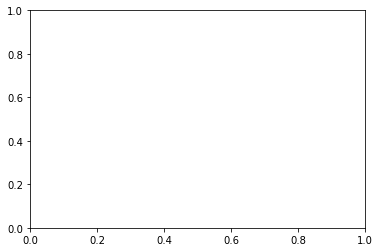

In [34]:
plt.scatter(mnist_pca[:,0], mnist_pca[:,1], c=mnist_target, 
            cmap=cm.Greys)
plt.title("Dataset Iris after PCA (2 components in scikit-learn)", size=18)
plt.xlabel("Principal Component 1", size=18)
plt.ylabel("Principal Component 2", size=18);

this sucks